In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

df = pd.read_csv('ratings_small.csv')
df.head(50)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


Precisamos passar todos os dados para uma matriz

Exemplo 3 usuarios e 4 filmes

usuario1 = [nota_1_1, nota_1_2, nota_1_3, nota_1_4]

usuario2 = [nota_2_1, nota_2_2, nota_2_3, nota_2_4]

usuario3 = [nota_3_1, nota_3_2, nota_3_3, nota_3_4]


portanto nossa matiz A ficaria assim:

$$
A = \begin{bmatrix}
    nota_{1,1} & nota_{1,2} & nota_{1,3} & nota_{1,4} \\
    nota_{2,1} & nota_{2,2} & nota_{2,3} & nota_{2,4} \\
    nota_{3,1} & nota_{3,2} & nota_{3,3} & nota_{3,4}
\end{bmatrix}
$$


In [6]:
# Criando a matriz de notas
matriz_notas = df.pivot_table(index='userId', columns='movieId', values='rating')
matriz_notas = matriz_notas.fillna(0)
matriz_notas.head(2)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

Precisamos criar uma função para comprimir a nossa matriz A, para isso vamos usar a função svd do numpy

Na decomposição SVD, a matriz A é decomposta em 3 matrizes, U, S e Vt ( $A = U \Sigma V^T$ )

U e Vt são matrizes ortogonais, ou seja, suas linhas e colunas são ortogonais entre si. S é uma matriz diagonal, ou seja, seus elementos fora da diagonal são nulos.

As colunas de U são os autovetores de $A^T A$ e as linhas de Vt são os autovetores de $AA^T$

A matriz S é uma matriz diagonal, onde seus elementos são os autovalores de $A^T A$ e $AA^T$

- O Objetivo dessa função é reduzir a dimensionalidade da matriz original, mantendo somente as K componentes mais importantes, ou seja, aquelas com os maiores valores singulares.



In [9]:
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:, :K]
    s_ = s[:K]
    vt_ = vt[:K, :]
    return u_, s_, vt_

---

Queremos avaliar nosso sistema de reconstrução de matriz, dando um valor aleatorio para a matriz A, e depois reconstruindo a matriz A com a função svd tentando recuperar a matriz original.

Começamos com 100 iteracoes, e vamos aumentando o numero de iteracoes para ver como a matriz A vai se aproximando da matriz original.

Salvamos em um csv o numero de iteracoes e as notas alteradas e novas, assim podemos calcular o erro entre as notas originais e as notas reconstruidas.

**NAO EXECUTAR AS CELULAS DE ITERACOES, POIS VAI AFETAR NOSSA BASE DE DADOS**

Iterações = 100

In [3]:
for n in range(100):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 150)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados100.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados100.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.812614317078896
Nota do usuário para o filme na matriz B:  4.758064303242228
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  2.0968541379283145
Nota do usuário para o filme na matriz B:  2.055263479986512
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  2.253369027828903
Nota do usuário para o filme na matriz B:  1.2183990683596457
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  1.0311881460770733
Nota do usuário para o filme na matriz B:  1.1320510938201664
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  1.2434132870463084
Nota do usuário para o fil

Iterações = 150

In [10]:
for n in range(150):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 150)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados150.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados150.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  4.5
Nota aleatória do usuário para o filme:  3.449998333429477
Nota do usuário para o filme na matriz B:  3.6565289506690495
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  3.583882945428207
Nota do usuário para o filme na matriz B:  1.9552327584761653
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  3.2564138587020297
Nota do usuário para o filme na matriz B:  1.0111180395559463
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  3.4460488602911292
Nota do usuário para o filme na matriz B:  3.3217606466483995
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  2.0440969094093715
Nota do usuário para o f

Iterações = 250

In [4]:
for n in range(250):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 150)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados250.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados250.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  2.0
Nota aleatória do usuário para o filme:  0.004406347137572708
Nota do usuário para o filme na matriz B:  -0.30899025588761464
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  4.9634527685901375
Nota do usuário para o filme na matriz B:  4.585145837087948
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  3.3306114984735484
Nota do usuário para o filme na matriz B:  2.9505225269649027
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.5
Nota aleatória do usuário para o filme:  3.040947395007929
Nota do usuário para o filme na matriz B:  3.0096601881250704
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  3.22078336182953
Nota do usuário para o

Iterações = 500

In [5]:
for n in range(500):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 150)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados500.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados500.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  2.7999866490414913
Nota do usuário para o filme na matriz B:  1.3563556787588702
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  0.8172117120396638
Nota do usuário para o filme na matriz B:  0.7112595480904422
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  1.6405837234097804
Nota do usuário para o filme na matriz B:  1.629827437071016
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  0.43470063461365005
Nota do usuário para o filme na matriz B:  0.03392583171559277
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  1.1840382091277313
Nota do usuário para 


Em todas nossas iterações, usamos a teoria presente no Readme, e conseguimos reduzir a dimensionalidade da matriz A, e com isso conseguimos reconstruir a matriz original (nossa matriz B) com erros muitas vezes grandes e outras vezes pequenos.

### Análise dos resultados

Abaixo, vamos utilizar gráficos para melhor visualizar as distribuições de erros entre as notas aleatórias e as notas reconstruídas.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
resultados100 = pd.read_csv('resultados100.csv')
resultados150 = pd.read_csv('resultados150.csv')
resultados250 = pd.read_csv('resultados250.csv')
resultados500 = pd.read_csv('resultados500.csv')

In [4]:
resultados_geral = pd.concat([resultados100, resultados150, resultados250, resultados500])

In [5]:
resultados_geral = resultados_geral.drop(columns=['Unnamed: 0'])

In [6]:
resultados_geral.head()

,nota,nota_aleatoria,nota_reconstruida
0,4.0,4.812614,4.758064
1,3.5,2.096854,2.055263
2,3.0,2.253369,1.218399
3,4.0,1.031188,1.132051
4,4.0,1.243413,1.143974


In [7]:
resultados_geral.describe()

,nota,nota_aleatoria,nota_reconstruida
count,1000.000000,1000.000000,1000.000000
mean,3.547000,2.496692,2.071329
std,1.073752,1.420120,1.378009
min,0.500000,0.001034,-0.911507
25%,3.000000,1.303102,0.911765
50%,4.000000,2.468939,1.946663
75%,4.000000,3.698148,3.073641
max,5.000000,4.995838,5.902583


Temos 1000 valores obtidos juntando todas as iterações realizadas. Agora, vamos calcular o erro absoluto para todas as iterações.

In [8]:
resultados_geral['erro_absoluto'] = abs(resultados_geral['nota'] - resultados_geral['nota_reconstruida'])

In [9]:
resultados_geral.head()

,nota,nota_aleatoria,nota_reconstruida,erro_absoluto
0,4.0,4.812614,4.758064,0.758064
1,3.5,2.096854,2.055263,1.444737
2,3.0,2.253369,1.218399,1.781601
3,4.0,1.031188,1.132051,2.867949
4,4.0,1.243413,1.143974,2.856026


In [10]:
resultados_geral.describe()

,nota,nota_aleatoria,nota_reconstruida,erro_absoluto
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.547000,2.496692,2.071329,1.865223
std,1.073752,1.420120,1.378009,1.180787
min,0.500000,0.001034,-0.911507,0.001238
25%,3.000000,1.303102,0.911765,0.860767
50%,4.000000,2.468939,1.946663,1.737363
75%,4.000000,3.698148,3.073641,2.796481
max,5.000000,4.995838,5.902583,5.256905


Com a descrição realizada acima, podemos observar que o erro absoluto médio obtido fou de 1.865, com desvio-padrão de 1.18, valores próximos aos obtidos em nossos testes para obtenção de K. Agora, vamos plotar um gráfico para melhor visualizar a distribuição dos erros.

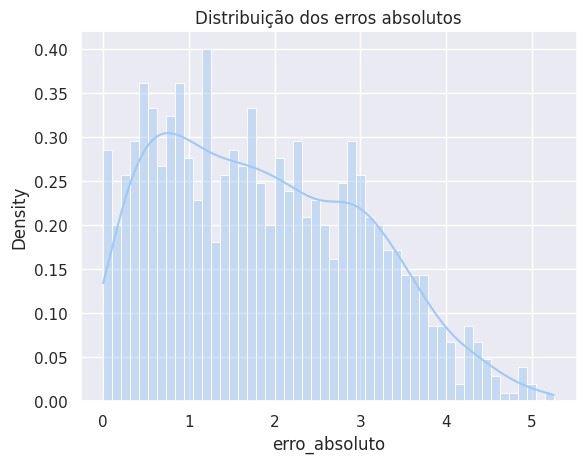

In [13]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.set_context('notebook')
sns.histplot(data=resultados_geral, x='erro_absoluto', bins=50, kde=True, stat='density')
plt.title('Distribuição dos erros absolutos')
plt.show()

In [14]:
print('Média dos erros absolutos: ', resultados_geral['erro_absoluto'].mean())
print('Desvio-padrão dos erros absolutos: ', resultados_geral['erro_absoluto'].std())

Média dos erros absolutos:  1.8652230219093162
Desvio-padrão dos erros absolutos:  1.1807869309525196


Com os resultados obtidos, é possível perceber que a distribuição dos erros é bem próxima de uma distribuição normal, com média de 1.865 e desvio-padrão de 1.18.